In [ ]:
import plotly.express as px
from importlib import reload
from utils import *

px.line(
    data_frame=usd_ind,
)
# this index states USD premium on foreign currency
# stylized fact: the dollar has become stronger vs EMs
# from 2006 than compared to advanced economies

In [2]:
# Jan 1999 = 100
px.line(
    data_frame=1 / (allspotsinusd / allspotsinusd.iloc[0]),
)

In [3]:
# Now it's the time for Long term yield spreads.
# This df contains 10y govt bond yields for each country
display(yields.tail())
px.line(yields)

GreatBritain10Y  Australia10Y  Canada10Y  Switzerland10Y  \
observation_date                                                             
2025-04-01                 4.5762         4.267   3.108571           0.326   
2025-05-01                 4.6004         4.350   3.221429           0.259   
2025-06-01                 4.5248         4.208   3.314000           0.410   
2025-07-01                 4.5924         4.291   3.527143           0.378   
2025-08-01                 4.6369         4.275   3.422500           0.320   

                  Chile10Y  Germany10Y  Spain10Y  Eurozone10Y  France10Y  \
observation_date                                                           
2025-04-01        5.649474    2.510500  3.229100     3.097221       3.26   
2025-05-01        5.796000    2.562857  3.208909     3.070995       3.26   
2025-06-01        5.734615    2.519048  3.167429     3.084761       3.24   
2025-07-01        5.624667    2.631304  3.243087     3.173563       3.36   
2025-08-01        5.603125    2.673333  3.256619     3.205046       3.42   

                  Israel10Y  Japan10Y  SouthKorea10Y  Mexico10Y  \
observation_date                                                  
2025-04-01             4.38     1.310          2.658       9.26   
2025-05-01             4.43     1.500          2.710       9.41   
2025-06-01             4.43     1.420          2.842       9.39   
2025-07-01             4.18     1.545          2.840       9.47   
2025-08-01             4.17     1.600          2.815       9.14   

                  NewZealand10Y  Sweden10Y  UnitedStates10Y  SouthAfrica10Y  
observation_date                                                             
2025-04-01                 4.55    2.41995             4.28       11.384737  
2025-05-01                 4.59    2.39785             4.42       11.065238  
2025-06-01                 4.58    2.31458             4.38       10.579500  
2025-07-01                 4.55    2.35752             4.39       10.396087  
2025-08-01                 4.41    2.43162             4.26       10.145238

In [ ]:
# Import mapping from utils
from utils import *

# just for working with it
gdp = gdp[[
    "REF_AREA",
    "UNIT_MEASURE",
    "TRANSFORMATION",
    "TIME_PERIOD",
    "OBS_VALUE",
    "REF_YEAR_PRICE",
    "CURRENCY"
]]
gdp.set_index('TIME_PERIOD', inplace=True)
# Remap REF_AREA to match 2-letter convention
gdp['REF_AREA'] = gdp['REF_AREA'].map(OECD_CODE_MAPPING).fillna(gdp['REF_AREA'])
# Add Country column with full country names
gdp['Country'] = gdp['REF_AREA'].map(CC_NAME_MAPPING)
gdp = gdp[gdp["REF_AREA"].str.len() < 3]
print((gdp["REF_AREA"].str.len() > 2).sum())
gdp.head()

In [14]:
from importlib import reload
import utils; reload(utils)
from utils import *

# Need to convert quarterly notation to day of month in gdp df
def convert_quarter(quarter : str) -> str:
    qmap = {
        'Q1' : "04-01",
        'Q2' : "07-01",
        'Q3' : "10-01",
        'Q4' : "01-01",
    }
    return quarter[:5] + qmap[quarter[5:]]
gdp['TIME_PERIOD'] = gdp['TIME_PERIOD'].apply(lambda x : convert_quarter(x))
gdp['REF_AREA'] = gdp['REF_AREA'].map(OECD_CODE_MAPPING)

yields = pd.melt(
    yields.reset_index(),
    id_vars='observation_date'
).set_index('observation_date')

yields.index.name = 'TIME_PERIOD'
yields['REF_AREA'] = yields['variable'].map(
    {v: k for k, v in CC_NAME_MAPPING.items()}
)
yields.columns = ['Country', 'OBS_VALUE_yield', 'REF_AREA']
gdp = gdp[gdp['Price base'] == 'Current prices']
gdp.rename(columns={'OBS_VALUE': 'OBS_VALUE_gdp'}, inplace=True)

merged_df = pd.merge(left=gdp.reset_index(), right=yields.reset_index(), how='inner', on=['TIME_PERIOD', 'REF_AREA'])
merged_df = merged_df.drop(columns='index').set_index('TIME_PERIOD',drop=True)
# Convert yields to BPs
merged_df['OBS_VALUE_yield'] = merged_df['OBS_VALUE_yield'] * 100
merged_df.head()

There are in total
0 series which do not have
the 6 digit unit multiplier.


/var/folders/j8/q1yzzyh9341fx__dgh644b400000gn/T/ipykernel_30816/444633187.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp.rename(columns={'OBS_VALUE': 'OBS_VALUE_gdp'}, inplace=True)


REF_AREA  Reference area UNIT_MEASURE            Unit of measure  \
TIME_PERIOD                                                                    
2004-07-01        GB  United Kingdom      USD_PPP  US dollars, PPP converted   
2004-10-01        GB  United Kingdom      USD_PPP  US dollars, PPP converted   
2005-04-01        GB  United Kingdom      USD_PPP  US dollars, PPP converted   
2005-07-01        GB  United Kingdom      USD_PPP  US dollars, PPP converted   
2005-10-01        GB  United Kingdom      USD_PPP  US dollars, PPP converted   

                 Price base TRANSFORMATION Transformation  OBS_VALUE_gdp  \
TIME_PERIOD                                                                
2004-07-01   Current prices             LA  Annual levels      1930919.8   
2004-10-01   Current prices             LA  Annual levels      1940408.1   
2005-04-01   Current prices             LA  Annual levels      1944560.9   
2005-07-01   Current prices             LA  Annual levels      1961900.9   
2005-10-01   Current prices             LA  Annual levels      1990275.3   

             REF_YEAR_PRICE  BASE_PER  Base period CURRENCY   Currency  \
TIME_PERIOD                                                              
2004-07-01              NaN       NaN          NaN      USD  US dollar   
2004-10-01              NaN       NaN          NaN      USD  US dollar   
2005-04-01              NaN       NaN          NaN      USD  US dollar   
2005-07-01              NaN       NaN          NaN      USD  US dollar   
2005-10-01              NaN       NaN          NaN      USD  US dollar   

                   Country  OBS_VALUE_yield  
TIME_PERIOD                                  
2004-07-01   Great Britain           510.83  
2004-10-01   Great Britain           476.83  
2005-04-01   Great Britain           462.18  
2005-07-01   Great Britain           430.11  
2005-10-01   Great Britain           434.82

In [15]:
import statsmodels.api as sm

# Linear regression with REF_AREA fixed effects
# Prepare data - ensure numeric types and drop NaNs
reg_data = merged_df[['OBS_VALUE_yield', 'OBS_VALUE_gdp', 'REF_AREA']].copy()
reg_data['OBS_VALUE_yield'] = pd.to_numeric(reg_data['OBS_VALUE_yield'], errors='coerce')
reg_data['OBS_VALUE_gdp'] = pd.to_numeric(reg_data['OBS_VALUE_gdp'], errors='coerce')
reg_data = reg_data.dropna()

# Create dummy variables for REF_AREA (fixed effects)
X = pd.get_dummies(reg_data[['OBS_VALUE_yield', 'REF_AREA']], columns=['REF_AREA'], drop_first=True)
y = reg_data['OBS_VALUE_gdp']

# Convert boolean dummies to int
X = X.astype(float)

# Add constant
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          OBS_VALUE_gdp   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:26:45   Log-Likelihood:                -95864.
No. Observations:                6045   AIC:                         1.918e+05
Df Residuals:                    6028   BIC:                         1.919e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.473e+05   1.17e+05     

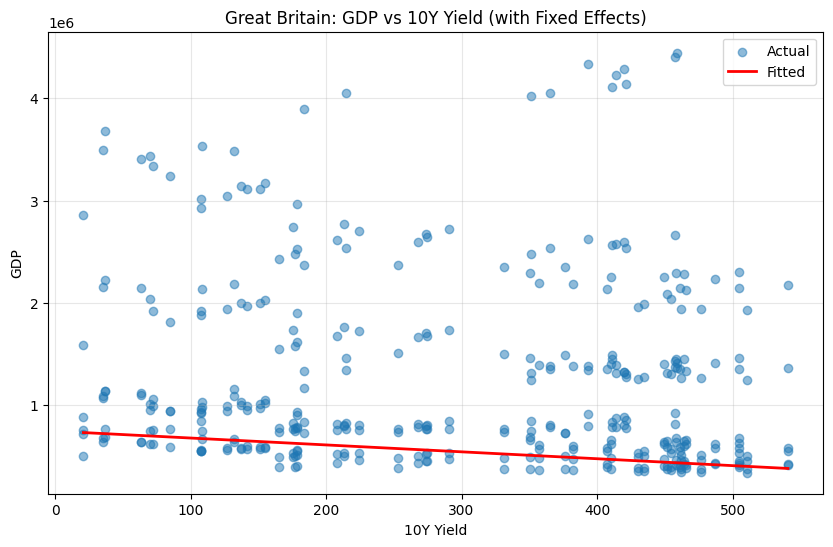

In [ ]:
# Plot fitted line for GB
import matplotlib.pyplot as plt

# Filter data for GB
gb_data = merged_df[merged_df['REF_AREA'] == 'GB'].copy()
gb_data = gb_data.sort_values('OBS_VALUE_yield')

# Get predictions for GB
gb_X = pd.get_dummies(gb_data[['OBS_VALUE_yield', 'REF_AREA']], columns=['REF_AREA'], drop_first=True)
gb_X = sm.add_constant(gb_X)
# Ensure all columns from training are present
for col in X.columns:
    if col not in gb_X.columns:
        gb_X[col] = 0
gb_X = gb_X[X.columns]  # Reorder columns to match
gb_predictions = model.predict(gb_X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(gb_data['OBS_VALUE_yield'], gb_data['OBS_VALUE_gdp'], alpha=0.5, label='Actual')
plt.plot(gb_data['OBS_VALUE_yield'], gb_predictions, color='red', linewidth=2, label='Fitted')
plt.xlabel('10Y Yield in Basis points')
plt.ylabel('GDP')
plt.title('Great Britain: GDP vs 10Y Yield (with Fixed Effects)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
# Regression with yield spread (country yield - US yield)
# Create yield spread variable
spread_data = merged_df[['OBS_VALUE_yield', 'OBS_VALUE_gdp', 'REF_AREA']].copy()
spread_data['OBS_VALUE_yield'] = pd.to_numeric(spread_data['OBS_VALUE_yield'], errors='coerce')
spread_data['OBS_VALUE_gdp'] = pd.to_numeric(spread_data['OBS_VALUE_gdp'], errors='coerce')

# Get US yield for each time period
us_yields = spread_data[spread_data['REF_AREA'] == 'US'][['OBS_VALUE_yield']].copy()
us_yields.columns = ['US_yield']

# Merge US yield back to all countries
spread_data = spread_data.merge(us_yields, left_index=True, right_index=True, how='left')

# Calculate yield spread (country yield - US yield)
spread_data['yield_spread'] = spread_data['OBS_VALUE_yield'] - spread_data['US_yield']

# Drop US observations and NaNs
spread_data = spread_data[spread_data['REF_AREA'] != 'US'].dropna()

# Create dummy variables for REF_AREA (fixed effects)
X_spread = pd.get_dummies(spread_data[['yield_spread', 'REF_AREA']], columns=['REF_AREA'], drop_first=True)
y_spread = spread_data['OBS_VALUE_gdp']

# Convert boolean dummies to float
X_spread = X_spread.astype(float)

# Add constant
X_spread = sm.add_constant(X_spread)

# Fit the model
model_spread = sm.OLS(y_spread, X_spread).fit()
print(model_spread.summary())

                            OLS Regression Results                            
Dep. Variable:          OBS_VALUE_gdp   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1595.
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:29:18   Log-Likelihood:            -5.0648e+05
No. Observations:               34002   AIC:                         1.013e+06
Df Residuals:                   33986   BIC:                         1.013e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          5.34e+05   1.53e+04     34.882   

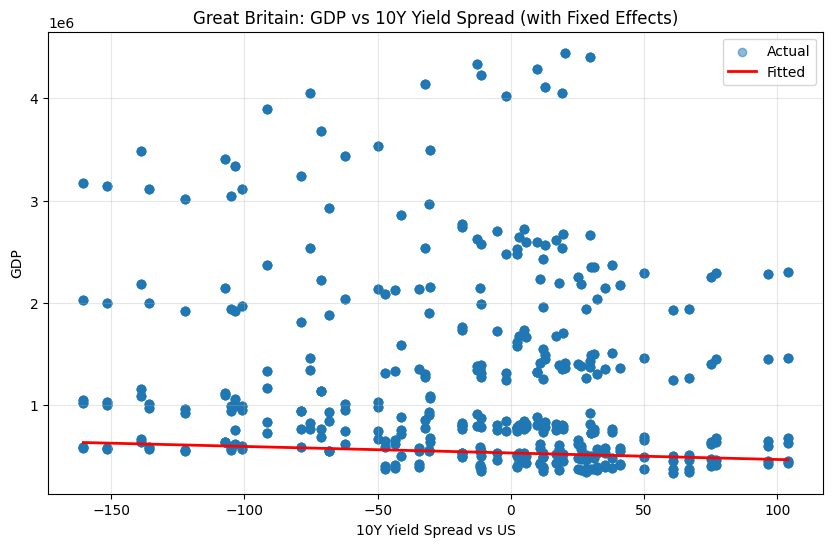

In [18]:
# Plot fitted line for GB with yield spread
import matplotlib.pyplot as plt

# Filter data for GB
gb_spread = spread_data[spread_data['REF_AREA'] == 'GB'].copy()
gb_spread = gb_spread.sort_values('yield_spread')

# Get predictions for GB
gb_X_spread = pd.get_dummies(gb_spread[['yield_spread', 'REF_AREA']], columns=['REF_AREA'], drop_first=True)
gb_X_spread = gb_X_spread.astype(float)
gb_X_spread = sm.add_constant(gb_X_spread)
# Ensure all columns from training are present
for col in X_spread.columns:
    if col not in gb_X_spread.columns:
        gb_X_spread[col] = 0
gb_X_spread = gb_X_spread[X_spread.columns]  # Reorder columns to match
gb_predictions_spread = model_spread.predict(gb_X_spread)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(gb_spread['yield_spread'], gb_spread['OBS_VALUE_gdp'], alpha=0.5, label='Actual')
plt.plot(gb_spread['yield_spread'], gb_predictions_spread, color='red', linewidth=2, label='Fitted')
plt.xlabel('10Y Yield Spread vs US')
plt.ylabel('GDP')
plt.title('Great Britain: GDP vs 10Y Yield Spread (with Fixed Effects)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
# Interactive plot with country selector
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def plot_country_spread(country_code):
    # Filter data for selected country
    country_spread = spread_data[spread_data['REF_AREA'] == country_code].copy()
    country_spread = country_spread.sort_values('yield_spread')
    
    # Get predictions for selected country
    country_X_spread = pd.get_dummies(country_spread[['yield_spread', 'REF_AREA']], columns=['REF_AREA'], drop_first=True)
    country_X_spread = country_X_spread.astype(float)
    country_X_spread = sm.add_constant(country_X_spread)
    # Ensure all columns from training are present
    for col in X_spread.columns:
        if col not in country_X_spread.columns:
            country_X_spread[col] = 0
    country_X_spread = country_X_spread[X_spread.columns]  # Reorder columns to match
    country_predictions_spread = model_spread.predict(country_X_spread)
    
    # Get country name from mapping
    from utils import CC_NAME_MAPPING
    country_name = CC_NAME_MAPPING.get(country_code, country_code)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(country_spread['yield_spread'], country_spread['OBS_VALUE_gdp'], alpha=0.5, label='Actual')
    plt.plot(country_spread['yield_spread'], country_predictions_spread, color='red', linewidth=2, label='Fitted')
    plt.xlabel('10Y Yield Spread vs US')
    plt.ylabel('GDP')
    plt.title(f'{country_name}: GDP vs 10Y Yield Spread (with Fixed Effects)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Get list of available countries (excluding US)
countries = sorted(spread_data['REF_AREA'].unique())

# Create dropdown widget
country_dropdown = widgets.Dropdown(
    options=countries,
    value='GB',
    description='Country:',
    disabled=False,
)

# Create interactive widget
widgets.interact(plot_country_spread, country_code=country_dropdown)

interactive(children=(Dropdown(description='Country:', index=7, options=('AU', 'CA', 'CH', 'CL', 'DE', 'ES', '…

<function __main__.plot_country_spread(country_code)>

In [ ]:
## Do same plot with inflation data